In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [4]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [7]:
DATADIR = "C:/Users/jungy/OneDrive/KHU/Software Convergence 101/images"

CATEGORIES = ["bus", "motorcycle", "sedan", "suv", "truck"]

for category in CATEGORIES: 
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path):
        try:
            img = load_img(path + '/' + img)  
            x = img_to_array(img)  
            x = x.reshape((1,) + x.shape)  
            i = 0
            for batch in datagen.flow(x, batch_size = 1, save_to_dir = path, save_prefix = category, save_format = 'jpg'):
                i +=1
                if i > 1:
                    break
        except Exception as e:
            pass

                

In [8]:
DATADIR = "C:/Users/jungy/OneDrive/KHU/Software Convergence 101/images"

CATEGORIES = ["bicycle", "bus", "motorcycle", "sedan", "suv", "truck"]

for category in CATEGORIES: 
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)

print(img_array.shape)
        


(269, 480)


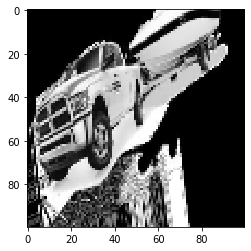

In [34]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [35]:
training_data = []

def create_training_data():
    for category in CATEGORIES: 
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()
        

In [36]:
print(len(training_data))

8860


In [37]:
import random

random.shuffle(training_data)

In [38]:
X = []
Y = []

for features, label in training_data:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = np.array(Y)

In [39]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [42]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle","rb")
Y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, Y, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
250/250 [==============================] - 236s 943ms/step - loss: 3.1487e-07 - accuracy: 0.1431 - val_loss: 3.2762e-07 - val_accuracy: 0.1377
Epoch 2/10
250/250 [==============================] - 234s 935ms/step - loss: 3.1487e-07 - accuracy: 0.1431 - val_loss: 3.2762e-07 - val_accuracy: 0.1377
Epoch 3/10
250/250 [==============================] - 235s 942ms/step - loss: 3.1487e-07 - accuracy: 0.1431 - val_loss: 3.2762e-07 - val_accuracy: 0.1377
Epoch 4/10
250/250 [==============================] - 251s 1s/step - loss: 3.1487e-07 - accuracy: 0.1431 - val_loss: 3.2762e-07 - val_accuracy: 0.1377
Epoch 5/10
250/250 [==============================] - 254s 1s/step - loss: 3.1487e-07 - accuracy: 0.1431 - val_loss: 3.2762e-07 - val_accuracy: 0.1377
Epoch 6/10
250/250 [==============================] - 254s 1s/step - loss: 3.1487e-07 - accuracy: 0.1431 - val_loss: 3.2762e-07 - val_accuracy: 0.1377
Epoch 7/10
250/250 [==============================] - 255s 1s/step - loss: 3.1487e-07